# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, post BN

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'bn':'post'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 2.978s 


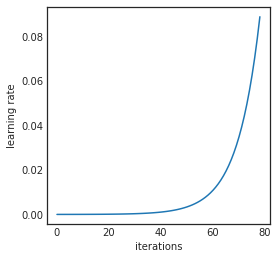

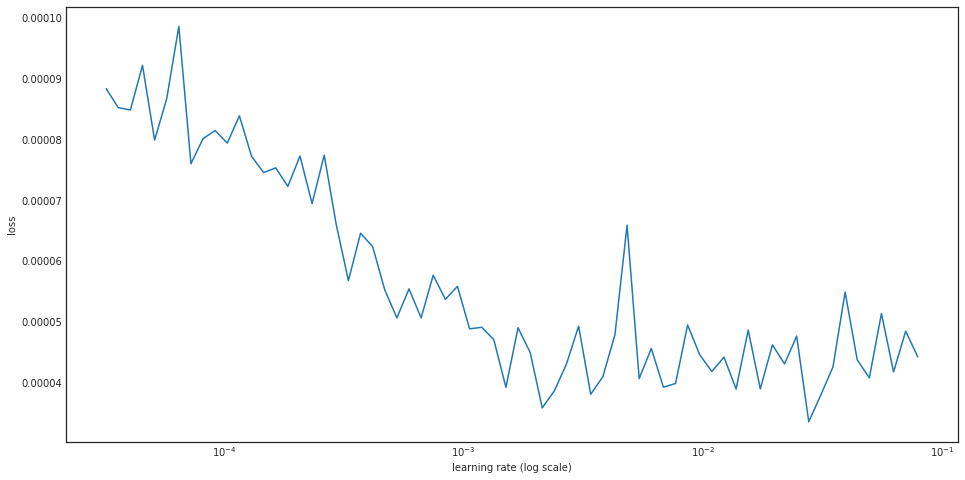

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.294878). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147739). Check your callbacks.
  % delta_t_median)


1 New best found: 4.73001790235e-05
2 New best found: 3.93177731696e-05
3 New best found: 3.62401310164e-05
4 New best found: 3.53166527155e-05
5 New best found: 3.45644985068e-05
6 New best found: 3.41384324189e-05
7 New best found: 3.39893293528e-05
9 New best found: 3.37948100517e-05
10 New best found: 3.37622621565e-05
11 New best found: 3.32783979129e-05
12 New best found: 3.30694125847e-05
13 New best found: 3.3008805737e-05
14 New best found: 3.2997679313e-05
15 New best found: 3.29725620383e-05
22 New best found: 3.28741741756e-05
23 New best found: 3.26574522296e-05
25 New best found: 3.25491374651e-05
26 New best found: 3.24454226166e-05
27 New best found: 3.24253022555e-05
28 New best found: 3.24131098714e-05
29 New best found: 3.23979011967e-05
30 New best found: 3.23802613988e-05
46 New best found: 3.23513760749e-05
48 New best found: 3.21125032892e-05
52 New best found: 3.21091593109e-05
56 New best found: 3.21051071228e-05
57 New best found: 3.20394803599e-05
58 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.414010). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207513). Check your callbacks.
  % delta_t_median)


1 New best found: 4.83460153304e-05
2 New best found: 3.91995849905e-05
3 New best found: 3.7122985802e-05
4 New best found: 3.7046722863e-05
5 New best found: 3.50816449676e-05
6 New best found: 3.46926904114e-05
7 New best found: 3.43981174805e-05
9 New best found: 3.43200876774e-05
10 New best found: 3.40321784081e-05
11 New best found: 3.37897329925e-05
12 New best found: 3.35933292695e-05
13 New best found: 3.33585985025e-05
14 New best found: 3.32390148001e-05
15 New best found: 3.3220987032e-05
20 New best found: 3.30275262923e-05
23 New best found: 3.29351253752e-05
24 New best found: 3.27885269887e-05
25 New best found: 3.26331452834e-05
26 New best found: 3.24404174939e-05
29 New best found: 3.23627931291e-05
30 New best found: 3.23568123393e-05
47 New best found: 3.22664640101e-05
51 New best found: 3.21863553678e-05
52 New best found: 3.20439833351e-05
53 New best found: 3.19948724739e-05
56 New best found: 3.19347326436e-05
88 New best found: 3.18778864706e-05
97 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.520165). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260458). Check your callbacks.
  % delta_t_median)


1 New best found: 4.79907565037e-05
2 New best found: 3.95748921505e-05
3 New best found: 3.71626336597e-05
4 New best found: 3.62690221675e-05
5 New best found: 3.56076954655e-05
6 New best found: 3.54691928733e-05
7 New best found: 3.5236114122e-05
9 New best found: 3.49993394102e-05
11 New best found: 3.45622084886e-05
13 New best found: 3.45386414793e-05
14 New best found: 3.43713410554e-05
15 New best found: 3.43320301364e-05
22 New best found: 3.41563687302e-05
25 New best found: 3.39806160013e-05
26 New best found: 3.37953760042e-05
27 New best found: 3.37252644235e-05
28 New best found: 3.36972446275e-05
29 New best found: 3.3664151772e-05
44 New best found: 3.36325905442e-05
46 New best found: 3.35208399698e-05
51 New best found: 3.35144473176e-05
54 New best found: 3.34581978766e-05
55 New best found: 3.33467563093e-05
104 New best found: 3.33376235196e-05
106 New best found: 3.33085794787e-05
108 New best found: 3.33028044369e-05
109 New best found: 3.32524713255e-05
115 New

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.577283). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.289171). Check your callbacks.
  % delta_t_median)


1 New best found: 5.04652193118e-05
2 New best found: 4.0866942616e-05
3 New best found: 3.74686524776e-05
4 New best found: 3.60901411816e-05
5 New best found: 3.52044595694e-05
6 New best found: 3.51045910678e-05
7 New best found: 3.50965179372e-05
8 New best found: 3.49221118403e-05
10 New best found: 3.45635104244e-05
11 New best found: 3.43047890088e-05
12 New best found: 3.41243143858e-05
13 New best found: 3.4123293686e-05
14 New best found: 3.39677603161e-05
15 New best found: 3.39354159551e-05
21 New best found: 3.3753172442e-05
23 New best found: 3.35720363578e-05
24 New best found: 3.35684030554e-05
26 New best found: 3.33924235819e-05
28 New best found: 3.33677191862e-05
29 New best found: 3.33407276728e-05
30 New best found: 3.33271014517e-05
43 New best found: 3.33058928072e-05
46 New best found: 3.32186079804e-05
47 New best found: 3.30820990332e-05
53 New best found: 3.29582532588e-05
58 New best found: 3.29276986195e-05
59 New best found: 3.29047808874e-05
95 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.660988). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.331042). Check your callbacks.
  % delta_t_median)


1 New best found: 4.94801298499e-05
2 New best found: 3.94256627597e-05
3 New best found: 3.63130824297e-05
4 New best found: 3.53996311065e-05
5 New best found: 3.42131908147e-05
6 New best found: 3.37112921387e-05
7 New best found: 3.36942933843e-05
9 New best found: 3.34855159555e-05
11 New best found: 3.31488104563e-05
12 New best found: 3.28468547732e-05
13 New best found: 3.26011769667e-05
14 New best found: 3.24711834998e-05
20 New best found: 3.23681931374e-05
22 New best found: 3.22687347501e-05
23 New best found: 3.2157120574e-05
25 New best found: 3.20599985761e-05
26 New best found: 3.19640467331e-05
28 New best found: 3.19104142081e-05
29 New best found: 3.18057303917e-05
30 New best found: 3.17962406985e-05
31 New best found: 3.17907213309e-05
47 New best found: 3.17603369132e-05
48 New best found: 3.16440729989e-05
50 New best found: 3.15607569733e-05
56 New best found: 3.14351825409e-05
58 New best found: 3.14224288174e-05
59 New best found: 3.13951560477e-05
95 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.691038). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.345986). Check your callbacks.
  % delta_t_median)


1 New best found: 4.76593750232e-05
2 New best found: 4.00150487372e-05
3 New best found: 3.78410977319e-05
4 New best found: 3.77180406036e-05
5 New best found: 3.59132306908e-05
6 New best found: 3.51592510503e-05
7 New best found: 3.50650472896e-05
10 New best found: 3.47289538215e-05
11 New best found: 3.46537470613e-05
12 New best found: 3.42898475065e-05
13 New best found: 3.40774805128e-05
14 New best found: 3.40084486815e-05
15 New best found: 3.39851282844e-05
21 New best found: 3.39327995976e-05
22 New best found: 3.37947428659e-05
23 New best found: 3.36069994881e-05
24 New best found: 3.35384889827e-05
25 New best found: 3.34213698438e-05
27 New best found: 3.33467664368e-05
28 New best found: 3.33249860613e-05
29 New best found: 3.32658150245e-05
31 New best found: 3.32582661367e-05
44 New best found: 3.32160048768e-05
45 New best found: 3.3127473572e-05
49 New best found: 3.29858517677e-05
51 New best found: 3.2912203244e-05
55 New best found: 3.28559447404e-05
56 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.753521). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.377301). Check your callbacks.
  % delta_t_median)


1 New best found: 5.01333793188e-05
2 New best found: 3.90163259021e-05
3 New best found: 3.65561279752e-05
4 New best found: 3.55172290157e-05
5 New best found: 3.47080682353e-05
6 New best found: 3.41759009046e-05
7 New best found: 3.39311017844e-05
9 New best found: 3.36760344951e-05
10 New best found: 3.33958510545e-05
12 New best found: 3.31898908819e-05
13 New best found: 3.29679547334e-05
14 New best found: 3.28879905173e-05
15 New best found: 3.2843310465e-05
22 New best found: 3.27295943381e-05
23 New best found: 3.25866714584e-05
24 New best found: 3.24064135885e-05
26 New best found: 3.24030493131e-05
27 New best found: 3.23538248163e-05
28 New best found: 3.23192257443e-05
30 New best found: 3.22799775547e-05
31 New best found: 3.22679954647e-05
46 New best found: 3.2194414334e-05
50 New best found: 3.20716592403e-05
51 New best found: 3.20546782003e-05
52 New best found: 3.20215156236e-05
53 New best found: 3.1966710869e-05
54 New best found: 3.19282824039e-05
57 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.856177). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.428864). Check your callbacks.
  % delta_t_median)


1 New best found: 4.86432684975e-05
2 New best found: 3.91313446813e-05
3 New best found: 3.67806008758e-05
4 New best found: 3.53616069203e-05
5 New best found: 3.46707526399e-05
6 New best found: 3.39999975128e-05
7 New best found: 3.39137584738e-05
9 New best found: 3.36948921411e-05
11 New best found: 3.32504708815e-05
12 New best found: 3.30785912679e-05
14 New best found: 3.30227774241e-05
15 New best found: 3.29989132523e-05
19 New best found: 3.28945847068e-05
20 New best found: 3.27877859872e-05
24 New best found: 3.25875747123e-05
26 New best found: 3.25349762506e-05
27 New best found: 3.24790030427e-05
28 New best found: 3.24475307352e-05
29 New best found: 3.23405907138e-05
30 New best found: 3.23265349959e-05
45 New best found: 3.22724855804e-05
46 New best found: 3.22164198109e-05
47 New best found: 3.21475555318e-05
55 New best found: 3.21231179034e-05
56 New best found: 3.20500454144e-05
98 New best found: 3.20166163986e-05
Early stopping after 158 epochs
Score is: {'lo

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.873076). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.437075). Check your callbacks.
  % delta_t_median)


1 New best found: 4.73455029095e-05
2 New best found: 3.90634316942e-05
3 New best found: 3.62818681592e-05
4 New best found: 3.58588132462e-05
5 New best found: 3.41246325396e-05
6 New best found: 3.38286885235e-05
9 New best found: 3.3686227993e-05
10 New best found: 3.345122909e-05
11 New best found: 3.3313675254e-05
12 New best found: 3.3200175458e-05
13 New best found: 3.29366521632e-05
14 New best found: 3.28526556595e-05
22 New best found: 3.26290882515e-05
24 New best found: 3.25003384913e-05
25 New best found: 3.24782525326e-05
26 New best found: 3.22408895867e-05
50 New best found: 3.2203268809e-05
54 New best found: 3.21886995946e-05
55 New best found: 3.21243524448e-05
58 New best found: 3.20455463896e-05
59 New best found: 3.2020671419e-05
60 New best found: 3.20199056155e-05
103 New best found: 3.1954536417e-05
Early stopping after 163 epochs
Score is: {'loss': 3.195453641699682e-05, 'AUC': 0.10042677652231058, 'wAUC': 0.06425464519289381}
Fold took 329.251s

Running fold

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.970720). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.485972). Check your callbacks.
  % delta_t_median)


1 New best found: 5.04486907605e-05
2 New best found: 4.05889497731e-05
3 New best found: 3.73200528622e-05
4 New best found: 3.55009777012e-05
5 New best found: 3.51529057872e-05
6 New best found: 3.4588337392e-05
7 New best found: 3.44306715699e-05
9 New best found: 3.43362668392e-05
10 New best found: 3.38454277753e-05
11 New best found: 3.38234252458e-05
12 New best found: 3.33322581988e-05
13 New best found: 3.3233747411e-05
21 New best found: 3.27883794917e-05
25 New best found: 3.27099066265e-05
26 New best found: 3.26274311931e-05
27 New best found: 3.25315828096e-05
28 New best found: 3.25212060124e-05
29 New best found: 3.24850623215e-05
30 New best found: 3.2420795666e-05
44 New best found: 3.23894263995e-05
48 New best found: 3.23258647137e-05
49 New best found: 3.22880924208e-05
50 New best found: 3.22838306434e-05
51 New best found: 3.22145857544e-05
52 New best found: 3.21861350913e-05
53 New best found: 3.21589444133e-05
54 New best found: 3.21133009017e-05
55 New best 

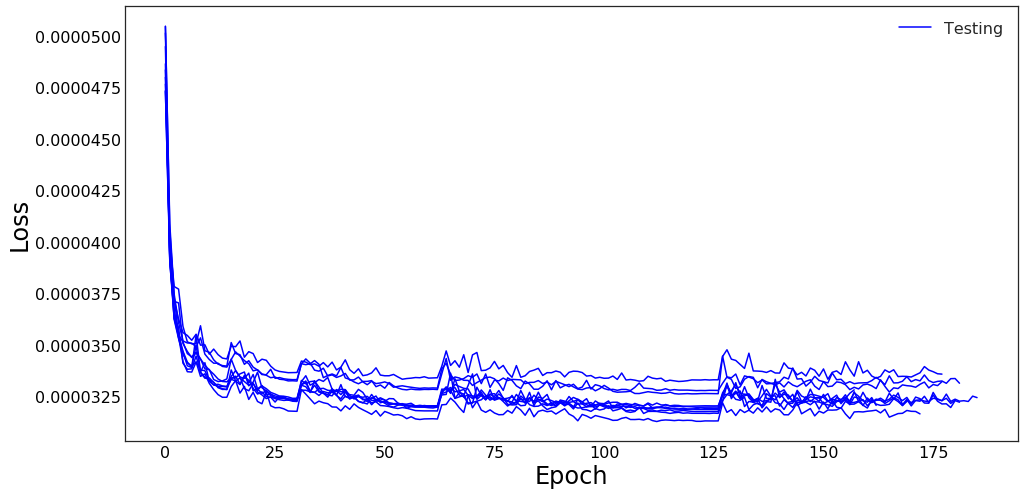

Mean wAUC = 0.0647 +- 0.0007
______________________________________



In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [9]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 4 with loss = 3.129573524430479e-05
Model 1 is 1 with loss = 3.1686322374143935e-05
Model 2 is 6 with loss = 3.178063366837052e-05
Model 3 is 0 with loss = 3.187625741059557e-05
Model 4 is 9 with loss = 3.1899237864609005e-05
Model 5 is 8 with loss = 3.195453641699682e-05
Model 6 is 7 with loss = 3.201661639864669e-05
Model 7 is 5 with loss = 3.262932402061293e-05
Model 8 is 3 with loss = 3.279507762768517e-05
Model 9 is 2 with loss = 3.3237479567205534e-05


## Response on development data

In [11]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00131756612929s per sample

Predicting batch 2 out of 10
Prediction took 0.000562752552566s per sample

Predicting batch 3 out of 10
Prediction took 0.00056539642281s per sample

Predicting batch 4 out of 10
Prediction took 0.000560503649712s per sample

Predicting batch 5 out of 10
Prediction took 0.000558836448193s per sample

Predicting batch 6 out of 10
Prediction took 0.000567168402672s per sample

Predicting batch 7 out of 10
Prediction took 0.000553002393246s per sample

Predicting batch 8 out of 10
Prediction took 0.000557949295151s per sample

Predicting batch 9 out of 10
Prediction took 0.000567507175179s per sample

Predicting batch 10 out of 10
Prediction took 0.000562819786516s per sample



In [12]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.905951634899, weighted 0.941828030012


## Response on val data

In [13]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000574999189377s per sample

Predicting batch 2 out of 10
Prediction took 0.000573986625671s per sample

Predicting batch 3 out of 10
Prediction took 0.000574478769302s per sample

Predicting batch 4 out of 10
Prediction took 0.00055778799057s per sample

Predicting batch 5 out of 10
Prediction took 0.000565452384949s per sample

Predicting batch 6 out of 10
Prediction took 0.000568946218491s per sample

Predicting batch 7 out of 10
Prediction took 0.000577635002136s per sample

Predicting batch 8 out of 10
Prediction took 0.000574035358429s per sample

Predicting batch 9 out of 10
Prediction took 0.000568672990799s per sample

Predicting batch 10 out of 10
Prediction took 0.000577412796021s per sample



In [14]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901648063828, weighted 0.934763971923


## Evaluation

### Import in dataframe

In [15]:
valframe = convertToDF(valData)

50000 candidates loaded


In [16]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

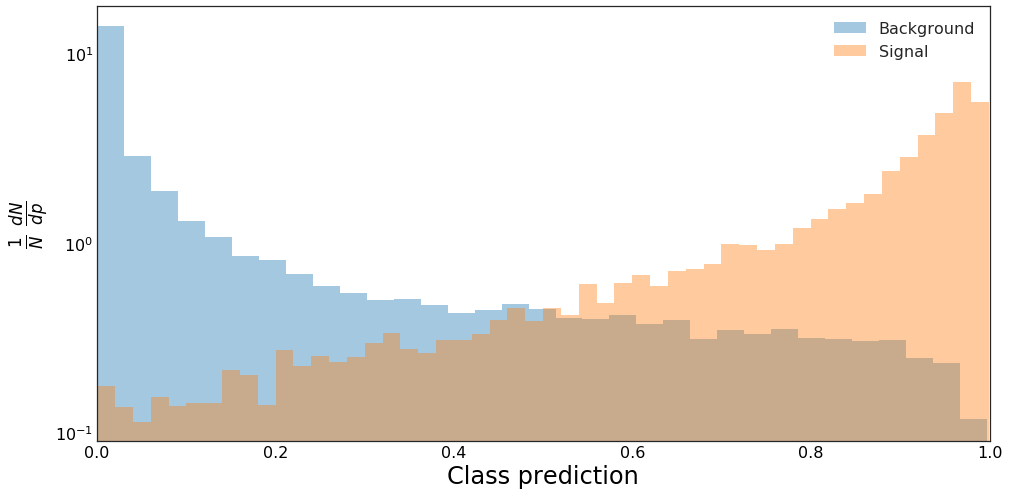

In [17]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [18]:
valframe['ams'] = amsScan(valframe)[0]

[0.9400030970573425, 1.6909498321587366]


In [19]:
bests = foldAMSScan(valframe, 10)

[0.9596466422080994, 2.630212701120737]
Fold 0, best AMS 2.63021270112 at cut of 0.959646642208. Total weights Signal:Bkg. 13.7303390503:8075.08935547


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.9393405318260193, 1.9013758107303451]
Fold 1, best AMS 1.90137581073 at cut of 0.939340531826. Total weights Signal:Bkg. 13.3866415024:8243.109375
[0.9675834774971008, 2.192141270252107]
Fold 2, best AMS 2.19214127025 at cut of 0.967583477497. Total weights Signal:Bkg. 14.0206003189:8336.37890625
[0.9669352769851685, 2.044425703826436]
Fold 3, best AMS 2.04442570383 at cut of 0.966935276985. Total weights Signal:Bkg. 13.945148468:8039.46630859
[0.9656423330307007, 1.7811566210697722]
Fold 4, best AMS 1.78115662107 at cut of 0.965642333031. Total weights Signal:Bkg. 13.9725160599:8178.37988281
[0.9062449336051941, 1.7170782183651951]
Fold 5, best AMS 1.71707821837 at cut of 0.906244933605. Total weights Signal:Bkg. 13.4894504547:8241.35742188
[0.9851014018058777, 1.991147457971517]
Fold 6, best AMS 1.99114745797 at cut of 0.985101401806. Total weights Signal:Bkg. 13.6014547348:8219.12695312
[0.9830349683761597, 1.782108658874952]
Fold 7, best AMS 1.78210865887 at cut of 0.98303496837

In [20]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000543899982626s per sample

Predicting batch 2 out of 10
Prediction took 0.000550438200344s per sample

Predicting batch 3 out of 10
Prediction took 0.000549505580555s per sample

Predicting batch 4 out of 10
Prediction took 0.000544376056845s per sample

Predicting batch 5 out of 10
Prediction took 0.000550235106728s per sample

Predicting batch 6 out of 10
Prediction took 0.000547654455358s per sample

Predicting batch 7 out of 10
Prediction took 0.000548496892235s per sample

Predicting batch 8 out of 10
Prediction took 0.000543078491905s per sample

Predicting batch 9 out of 10
Prediction took 0.00054503530589s per sample

Predicting batch 10 out of 10
Prediction took 0.000545667162809s per sample



In [21]:
saveTest(0.9634438912585132, 'Day_6')

../Data/Day_6_test.csv


In [22]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6 post bn"

Successfully submitted to Higgs Boson Machine Learning Challenge